In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RegexpTokenizer
import pickle
import re
from keras.layers import Embedding
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data.txt'
text = open(path, 'rb').read().decode('utf-8').lower()
special_char = '@_-,!#$%^&*()<>?/"\|®}{~…©.”“:;[]'
for i in special_char:
    text = text.replace(i, ' ')
print('corpus length:', len(text))

corpus length: 203604


In [ ]:
words = nltk.word_tokenize(text)
print(len(words))
print(words[40000:40100])

43824
['chương', 'trình', 'tiếp', 'sức', 'nhà', 'nông', 'hỗ', 'trợ', 'sinh', 'kế', 'làm', 'ăn', 'những', 'nông', 'dân', 'nghèo', 'ở', 'tỉnh', 'ninh', 'bình', 'tin', 'rằng', 'những', 'tháng', 'ngày', 'tươi', 'sáng', 'hơn', 'đang', 'chờ', 'mình', 'ở', 'phía', 'trước', 'theo', 'dõi', 'tuổi', 'trẻ', 'online', 'copyright', '2018', 'tuoitre', 'online', 'all', 'rights', 'reserved', 'tuổi', 'trẻ', 'online', 'giữ', 'bản', 'quyền', 'nội', 'dung', 'trên', 'website', 'này', 'tên', 'đầy', 'đủ', 'của', 'bạn', 'email', 'sđt', 'liên', 'hệ', 'mô', 'tả', 'video', 'mã', 'xác', 'nhận', 'gửi', 'video', 'của', 'bạn', 'ttct', 'rồi', 'một', 'hôm', 'hắn', 'chợt', 'nghĩ', 'là', 'nếu', 'đeo', 'mặt', 'nạ', 'thì', 'hắn', 'sẽ', 'được', 'giải', 'thoát', 'khỏi', 'những', 'lo', 'lắng', 'ấy', 'ttct']


In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
LENGTH_WORD = 3
next_words = []
prev_words = []
for j in range(len(words) - LENGTH_WORD):
     prev_words.append(words[j:j + LENGTH_WORD])
     next_words.append(words[j + LENGTH_WORD])
X = np.zeros((len(prev_words), LENGTH_WORD, len(unique_words)), dtype=int)
Y = np.zeros((len(next_words), len(unique_words)), dtype=int)
print(X)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(LENGTH_WORD, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
326/326 [==============================] - 37s 108ms/step - loss: 7.0808 - accuracy: 0.0503 - val_loss: 4.8090 - val_accuracy: 0.2660
Epoch 2/10
326/326 [==============================] - 37s 113ms/step - loss: 5.7580 - accuracy: 0.1809 - val_loss: 3.1624 - val_accuracy: 0.4635
Epoch 3/10
326/326 [==============================] - 40s 121ms/step - loss: 4.9144 - accuracy: 0.2747 - val_loss: 2.4148 - val_accuracy: 0.6099
Epoch 4/10
326/326 [==============================] - 42s 128ms/step - loss: 4.4017 - accuracy: 0.3511 - val_loss: 1.8486 - val_accuracy: 0.7112
Epoch 5/10
326/326 [==============================] - 43s 131ms/step - loss: 3.9611 - accuracy: 0.4171 - val_loss: 1.5294 - val_accuracy: 0.7842
Epoch 6/10
326/326 [==============================] - 42s 128ms/step - loss: 3.6030 - accuracy: 0.4763 - val_loss: 1.2869 - val_accuracy: 0.8344
Epoch 7/10
326/326 [==============================] - 42s 130ms/step - loss: 3.3114 - accuracy: 0.5242 - val_loss: 1.1104 - val_ac

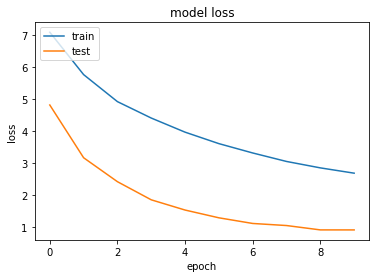

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

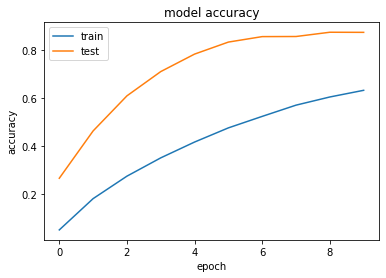

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
link_dr = '/content/drive/MyDrive/Colab Notebooks/'
model.save(f'{link_dr}next_word_predict_model.h5')
pickle.dump(history, open(f'{link_dr}history.p', "wb"))
model = load_model(f'{link_dr}next_word_predict_model.h5')
history = pickle.load(open(f'{link_dr}history.p', "rb"))

In [ ]:
def prepare_input(text):
    x = np.zeros((1, LENGTH_WORD, len(unique_words)))
    for t, word in enumerate(text.split()):
        x[0, t, unique_word_index[word]] = 1
    return x

In [ ]:
def sample(preds, top_n):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completions(text, n):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [ ]:
while True:
  seq = input("TEXT: ").lower()
  try:
    print("next possible words: ", predict_completions(seq, LENGTH_WORD))
  except KeyError:
    print("")

next possible words:  ['người', 'đầu', 'muốn']
next possible words:  ['tin', 'an', 'toàn']
next possible words:  ['tôi', 'thể', 'trình']
